In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np 
from pandas_datareader import data as web


In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns
#sns.set_style('whitegrid')
#%matplotlib inline


In [3]:
from datetime import datetime


In [4]:
from __future__ import division


In [5]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL','GOOG','MSFT','AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)

# For loop for grabing yahoo finance data and setting as a dataframe
for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = web.DataReader(stock,'yahoo',start,end)


In [6]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000
mean,196.676972,192.897450,194.716494,194.866574,3.065567e+07,193.287292
std,25.270925,25.332131,25.233966,25.400633,1.278686e+07,25.923114
min,145.720001,142.000000,143.979996,142.190002,1.136200e+07,140.085220
25%,175.934998,173.555000,174.805000,174.794998,2.152470e+07,172.847198
50%,198.850006,193.820007,196.419998,197.000000,2.725300e+07,194.916260
75%,209.604996,207.095001,208.460007,208.705002,3.631565e+07,207.138733
max,262.160004,258.279999,258.739990,262.160004,9.574460e+07,262.160004


In [7]:
AAPL.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2018-11-12 to 2019-11-11
Data columns (total 6 columns):
High         251 non-null float64
Low          251 non-null float64
Open         251 non-null float64
Close        251 non-null float64
Volume       251 non-null float64
Adj Close    251 non-null float64
dtypes: float64(6)
memory usage: 13.7 KB


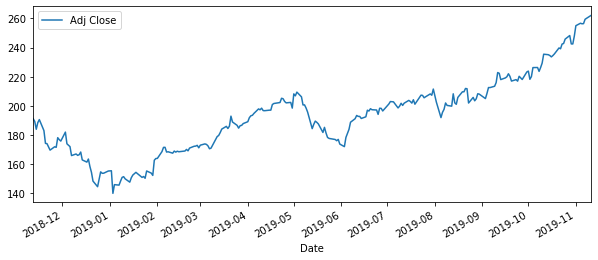

In [8]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))


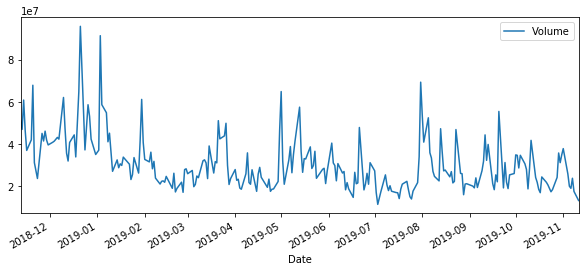

In [9]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))


In [10]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()


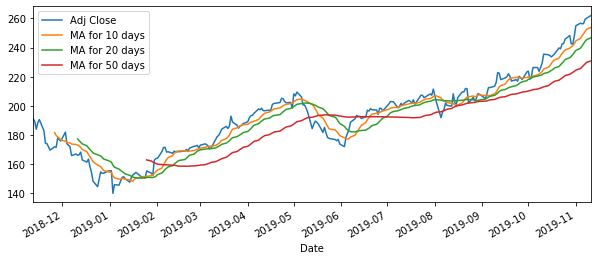

In [11]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))


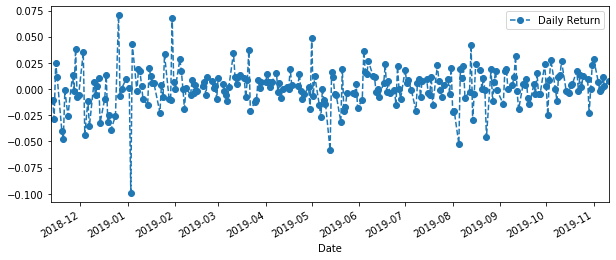

In [12]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')


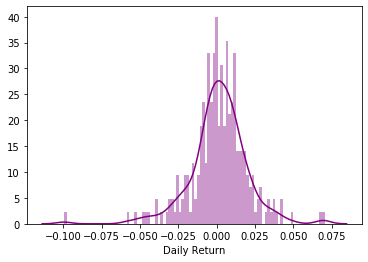

In [13]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')


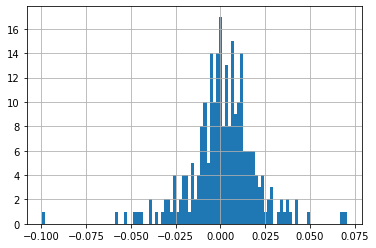

In [14]:
AAPL['Daily Return'].hist(bins=100)


In [15]:
closing_df = web.DataReader(tech_list,'yahoo',start,end)['Adj Close']


In [16]:
closing_df.head()


Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-11-12,191.295761,1636.849976,1038.630005,105.216652
2018-11-13,189.384476,1631.170044,1036.050049,105.285568
2018-11-14,184.034882,1599.010010,1043.660034,103.792503
2018-11-15,188.576630,1619.439941,1064.709961,106.076599
2018-11-16,190.665237,1593.410034,1061.489990,107.075256


In [17]:
tech_rets = closing_df.pct_change()


In [18]:
tech_rets.head()


Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-11-12,NaN,NaN,NaN,NaN
2018-11-13,-0.009991,-0.003470,-0.002484,0.000655
2018-11-14,-0.028247,-0.019716,0.007345,-0.014181
2018-11-15,0.024679,0.012777,0.020169,0.022006
2018-11-16,0.011076,-0.016073,-0.003024,0.009414


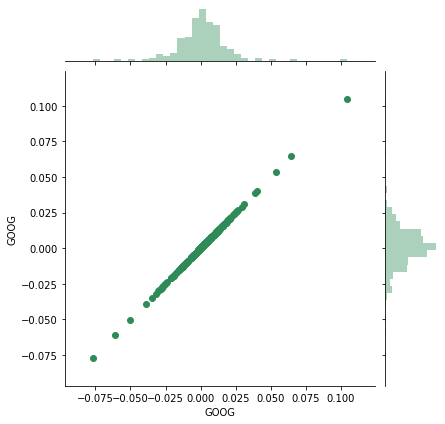

In [19]:
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')


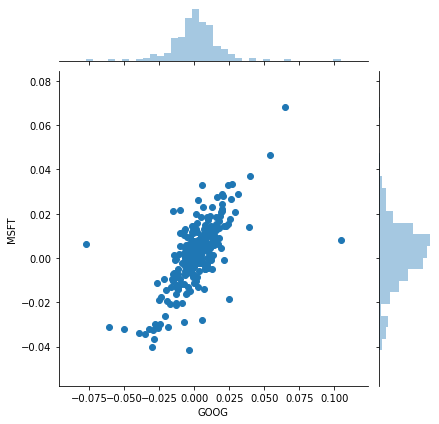

In [20]:
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter')


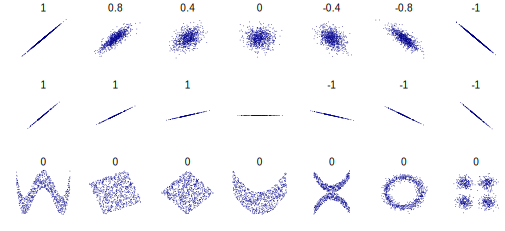

In [21]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')


In [22]:
tech_rets.head()


Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-11-12,NaN,NaN,NaN,NaN
2018-11-13,-0.009991,-0.003470,-0.002484,0.000655
2018-11-14,-0.028247,-0.019716,0.007345,-0.014181
2018-11-15,0.024679,0.012777,0.020169,0.022006
2018-11-16,0.011076,-0.016073,-0.003024,0.009414


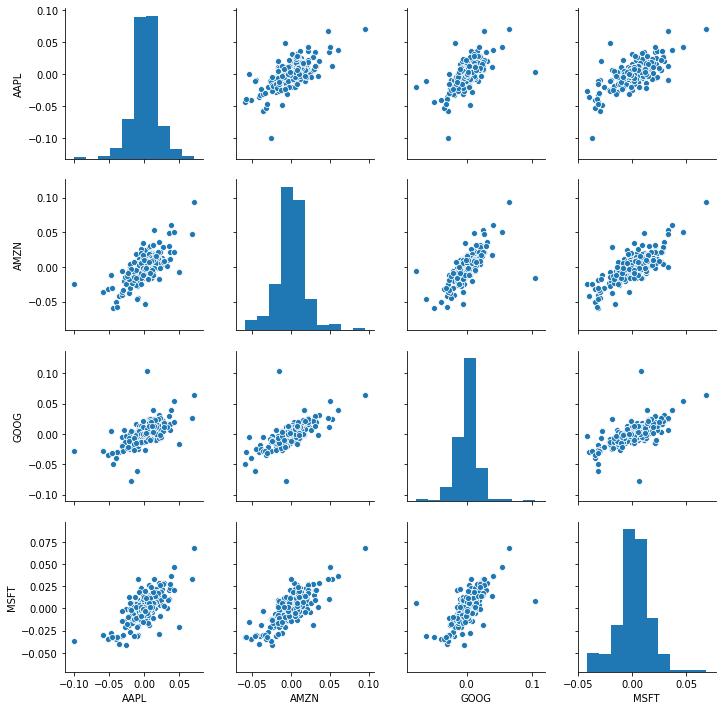

In [23]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis of all the comparisons
sns.pairplot(tech_rets.dropna())


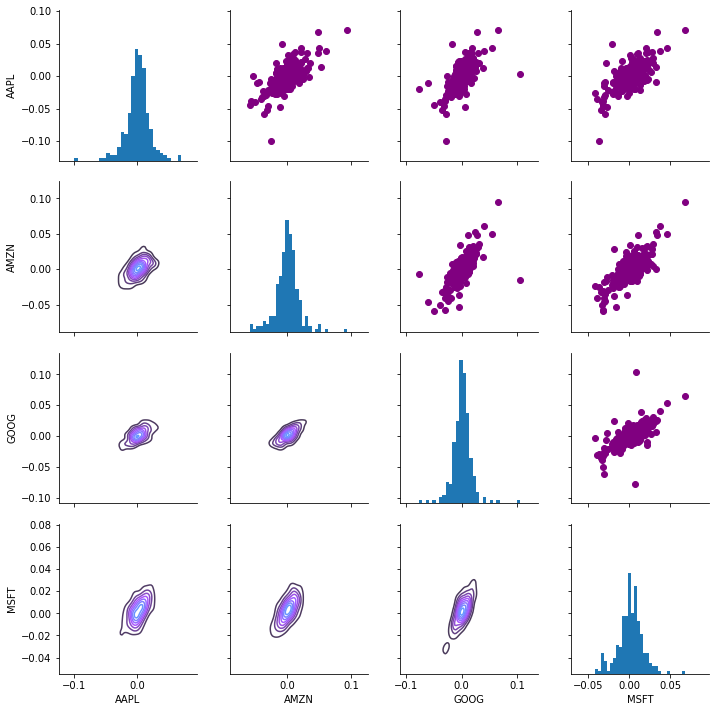

In [24]:
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)


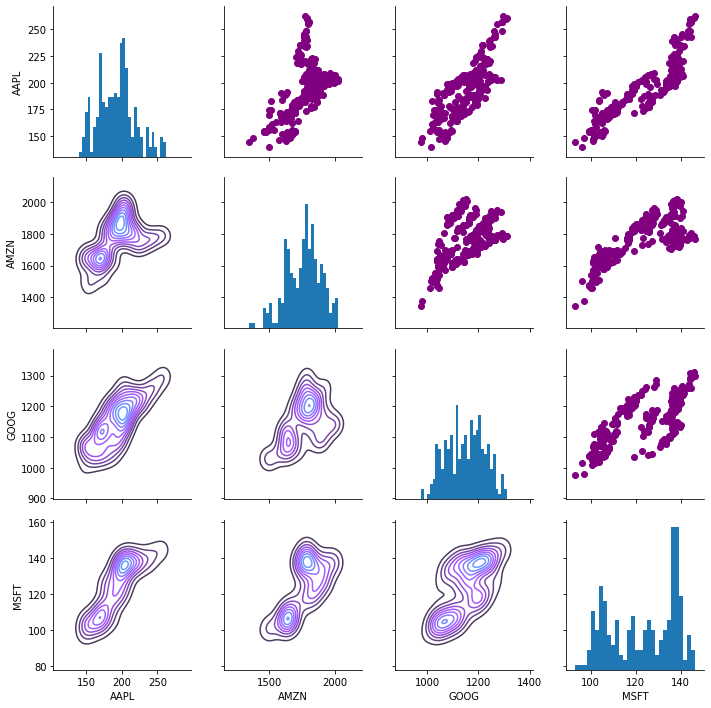

In [25]:
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)


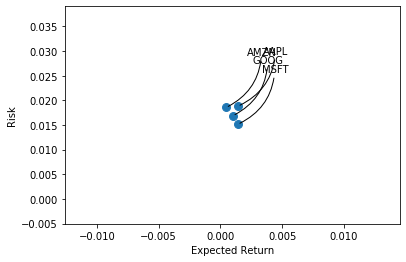

In [26]:
rets = tech_rets.dropna()
area = np.pi*20
plt.scatter(rets.mean(),rets.std(),s=area)
plt.xlabel('Expected Return')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))


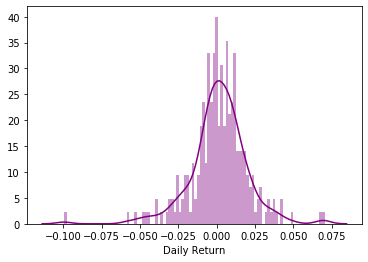

In [27]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')


In [28]:
rets.head()


Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-11-13,-0.009991,-0.003470,-0.002484,0.000655
2018-11-14,-0.028247,-0.019716,0.007345,-0.014181
2018-11-15,0.024679,0.012777,0.020169,0.022006
2018-11-16,0.011076,-0.016073,-0.003024,0.009414
2018-11-19,-0.039632,-0.050910,-0.039087,-0.033890


In [29]:
rets['AAPL'].quantile(0.05)


-0.029082051203488245

In [30]:
days = 365
dt = 1/days
mu = rets.mean()['GOOG']
sigma = rets.std()['GOOG']


In [31]:
def stock_monte_carlo(start_price,days,mu,sigma):
    price = np.zeros(days)
    price[0] = start_price

    shock = np.zeros(days)
    drift = np.zeros(days)

    for x in range(1,days):
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        drift[x] = mu*dt
        price[x] = price[x-1]+(price[x-1]*(drift[x]+shock[x]))
    return price


In [32]:
GOOG.head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-11-12,1062.119995,1031.000000,1061.390015,1038.630005,1471800,1038.630005
2018-11-13,1056.604980,1031.150024,1043.290039,1036.050049,1513700,1036.050049
2018-11-14,1054.563965,1031.000000,1050.000000,1043.660034,1565900,1043.660034
2018-11-15,1071.849976,1031.780029,1044.709961,1064.709961,1836100,1064.709961
2018-11-16,1067.000000,1048.979980,1059.410034,1061.489990,1658100,1061.489990


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

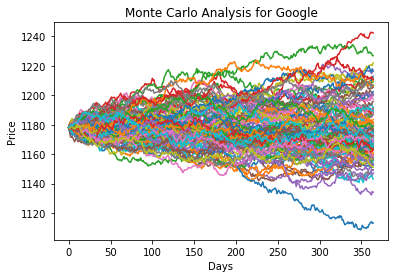

In [33]:
start_price = 1178.000000
for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')
